In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error
m = loadmat("./ECE661_Fall21_dataset.mat")
X=np.array(m["X"])
D=np.array(m["D"])
print(X.shape)
print(D.shape)
N=X.shape[0]
dim=X.shape[1]
print(N)

(100, 3)
(100, 1)
100


$$K=100$$
$$
D=\left[\begin{array}{c}
d_{1} \\
\vdots \\
d_{K}
\end{array}\right], X=\left[\begin{array}{c}
X_{1}^{T} \\
\vdots \\
X_{K}^{T}
\end{array}\right]
$$


$$
W^{*}=\left(X^{T} X\right)^{-1} X^{T} D
$$



In [2]:
h1 = np.matrix( np.dot(X.T,X)).I
W_op = np.dot(np.dot(h1,X.T),D)
print(W_op)

[[ 0.99769073]
 [-2.00001451]
 [ 2.99870453]]


The optimal weight is $$ b= [ 0.99769073] \qquad w1= [-2.00001451] \qquad w2= [ 2.99870453] $$

$$ y  =  0.99769073 -2.00001451 * X1 + 2.99870453 *X2 $$

In [3]:
y = np.dot(X,W_op)
MSE= mean_squared_error(D, y)/2
print(MSE)

MSE_v =(np.dot((D - y).T,(D-y))/(2*N))
print(MSE_v)

6.145138742034195e-05
[[6.14513874e-05]]


The MSE for this weight is 6.145138742034195e-05 from sklearn function. 
<br>
<br>
MSE funtion is expressed as following
$$
MSE \, Loss = \frac{1}{2N}(y-D)^{T}(y-D)
$$

In [4]:
def get_error(W,X,D):
    return D-(np.dot(X,W))
def Weight_update(lr,W_old,X,D):
    for d in range(N) :
        y=np.dot(X[d,:],W_old)
        error= D[d,:]-y
        dx = error*X[d,:]
        W_new = W_old.reshape(3,1)+lr*(dx.reshape(3,1))    
    return W_new
def get_MSE(D,W,X):
    y = np.dot(X,W)
    
    #MSE= mean_squared_error(D, y)/2
    MSE =(np.dot((D - y).T,(D-y))/(2*N))
    return MSE

In [5]:
epoch = 20
lr = 0.01
MSE_epoch =np.zeros([epoch ,1])
weight_epoch = np.zeros([epoch,dim])
W_old=np.array([0,0,0]).reshape(dim,1)

In [7]:
for this in range(epoch):
    weight_epoch[this,:]=W_old.reshape(dim)
    for d in range(N) :
        s=np.dot(X[d,:],W_old)
        error= D[d,:]-s

        dx = error*X[d,:]
        W_new = W_old.reshape(3,1)+lr*(dx.reshape(3,1))
        W_old = W_new
    #W_new = Weight_update(lr,W_old,X,D)
    
    MSE_this =get_MSE(D,W_new,X)
    MSE_epoch[this,:]=MSE_this


In [14]:
print("this is the 20th weight : {}".format(weight_epoch[-1,:]))
print("this is the 20th MSE : {}".format( MSE_epoch[-1,:]))

this is the 20th weight : [ 0.9976169  -1.99979503  2.99898621]
this is the 20th MSE : [6.15380097e-05]


In [15]:
log_MSE= np.log(MSE_epoch)

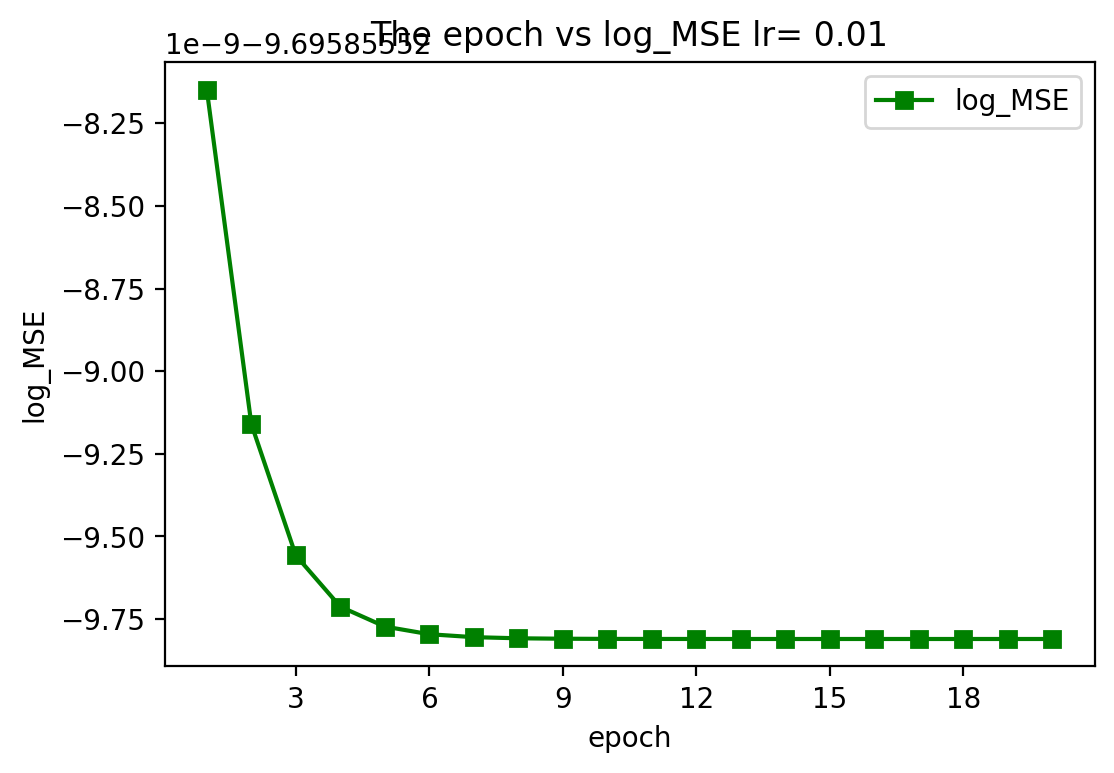

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.figure(dpi=200)
plt.plot(range(1,21),log_MSE.reshape(20,1),'s-',color = 'g',label="log_MSE")#
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("The epoch vs log_MSE lr= {}".format(lr))
plt.xlabel("epoch")#
plt.ylabel("log_MSE")#
plt.legend(loc = "best")#
plt.savefig("the epoch vs log_MSE_lr{}.png".format(lr))
plt.show()

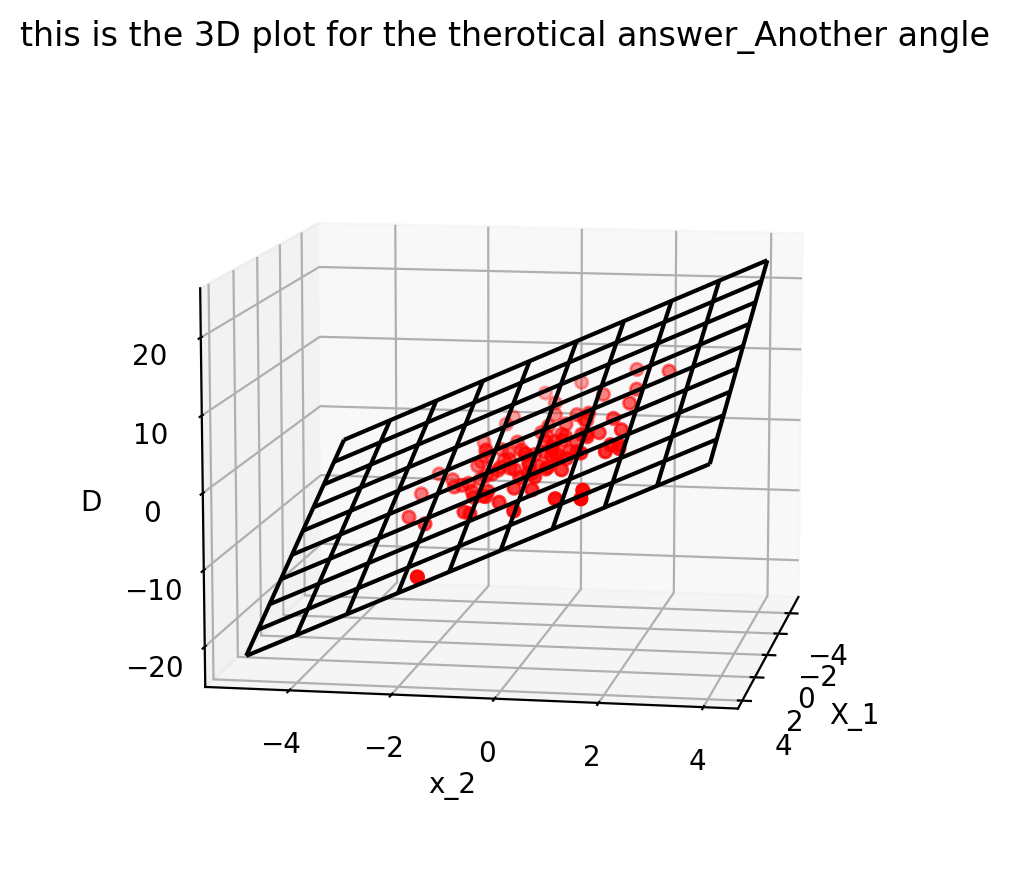

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
y_pre= np.dot(X,weight_epoch[-1,:]).reshape(N,1)

fig = plt.figure(dpi=200)
ax = Axes3D(fig)
ax.scatter3D(X[:,1],X[:,2], D,color='r')
ax.set_xlabel('X_1')
ax.set_ylabel('x_2')
ax.set_zlabel('D')

y =np.arange(-5,5,1).reshape(-1,1)
z =np.arange(-5,5,1).reshape(-1,1)
def f(y,z):
    return 0.99769073-2.00001451*y +2.99870453*z

Y, Z= np.meshgrid(y, z)
L = f(Y, Z)

ax.plot_wireframe(Y,Z, L, color='black')

ax.set_title("this is the 3D plot for the therotical answer_Another angle")

ax.view_init(10, 10)
plt.savefig("this is the 3D plot for the therotical answer_Another angle.png",dpi=200, bbox_inches = 'tight')
plt.show()



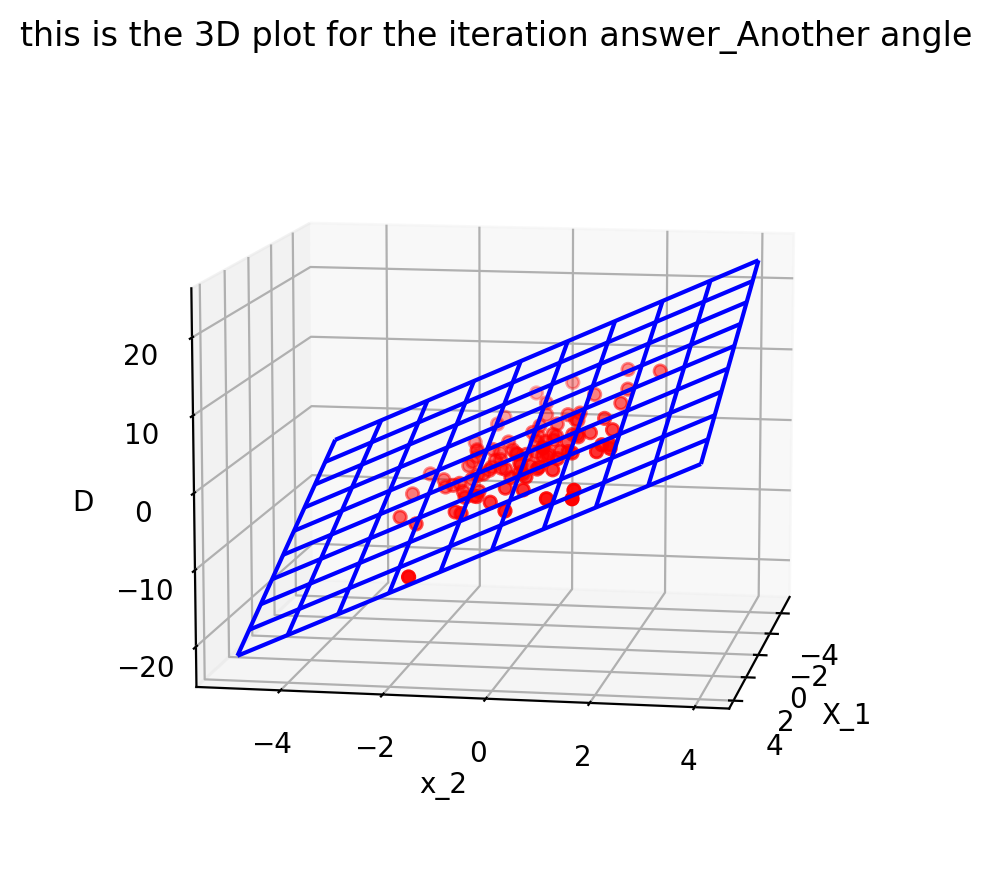

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
y_pre= np.dot(X,weight_epoch[-1,:]).reshape(N,1) 
fig = plt.figure(dpi=200)
ax = Axes3D(fig)
ax.scatter3D(X[:,1],X[:,2] , D,color='r')
ax.set_xlabel('X_1')
ax.set_ylabel('x_2')
ax.set_zlabel('D')

y =np.arange(-5,5,1).reshape(-1,1)
z =np.arange(-5,5,1).reshape(-1,1)
def f(y,z):
    return weight_epoch[-1,0]+weight_epoch[-1,1]*y +weight_epoch[-1,2]*z

Y, Z= np.meshgrid(y, z)
L = f(Y, Z)

ax.plot_wireframe(Y,Z, L, color='blue')

ax.set_title("this is the 3D plot for the iteration answer_Another angle")
ax.view_init(10, 10)
plt.savefig("this is the 3D plot for the iteration answer_Another angle.png",dpi=200,bbox_inches = 'tight')

plt.show()

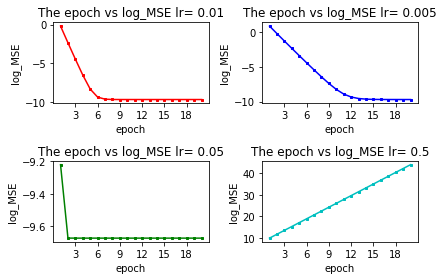

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

epoch = 20 
lr_list=[0.01,0.005, 0.05, 0.5 ]
color=["r","b","g","c"]
log_MSE=None
fig=plt.figure()
for id in range(1, 5):
    co = color[id-1]
    ax=plt.subplot(2, 2, id)
    lr = lr_list[id-1]
    MSE_epoch =np.zeros([epoch ,1])
    weight_epoch = np.zeros([epoch,dim])
    W_old=np.array([0,0,0]).reshape(dim,1)
    for this in range(epoch):
        weight_epoch[this,:]=W_old.reshape(dim)
        for d in range(N) :
            s=np.dot(X[d,:],W_old)

            error= D[d,:]-s

            dx = error*X[d,:]
            W_new = W_old.reshape(3,1)+lr*(dx.reshape(3,1))
            W_old = W_new
        MSE_this =get_MSE(D,W_new,X)
        MSE_epoch[this,:]=MSE_this
    log_MSE= np.log(MSE_epoch)
    
    
    
    ax.plot(range(1,21),log_MSE.reshape(20,1),'s-',markersize=2,color = co ,label="log_MSE")#s-:方形
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title("The epoch vs log_MSE lr= {}".format(lr))
    ax.set_xlabel("epoch")
    ax.set_ylabel("log_MSE")

fig.tight_layout()
#fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig("the epoch vs log_MSE_different lr.png",dpi=200)
plt.show()



(20, 1)
(20, 3)


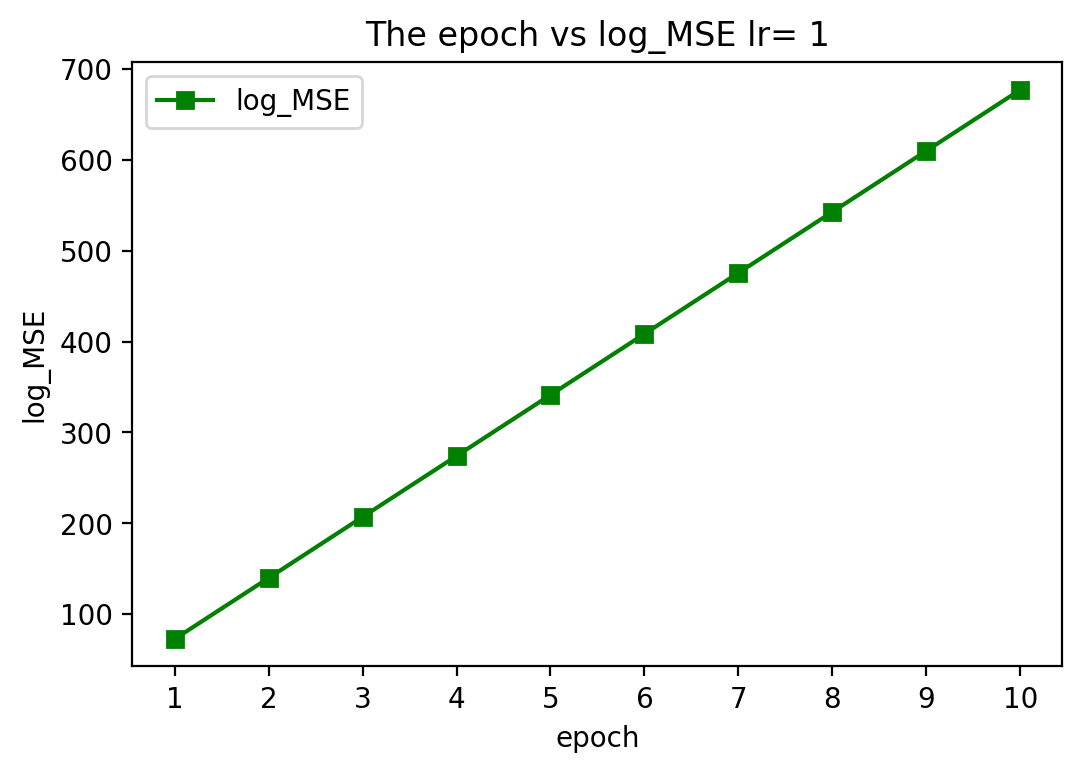

In [19]:
epoch = 20
lr = 1
MSE_epoch =np.zeros([epoch ,1])
print(MSE_epoch.shape)
weight_epoch = np.zeros([epoch,dim])
print(weight_epoch.shape)
W_old=np.array([0,0,0]).reshape(dim,1)
for this in range(epoch):
    weight_epoch[this,:]=W_old.reshape(dim)
    for d in range(N) :
            s=np.dot(X[d,:],W_old)

            error= D[d,:]-s

            dx = error*X[d,:]
            W_new = W_old.reshape(3,1)+lr*(dx.reshape(3,1))
            W_old = W_new
    MSE_this =get_MSE(D,W_new,X)
    MSE_epoch[this,:]=MSE_this
log_MSE= np.log(MSE_epoch)
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.figure(dpi=200)
plt.plot(range(1,21),log_MSE.reshape(20,1),'s-',color = 'g',label="log_MSE")#s-:方形
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("The epoch vs log_MSE lr= {}".format(lr))
plt.xlabel("epoch")#横坐标名字
plt.ylabel("log_MSE")#纵坐标名字
plt.legend(loc = "best")#图例
plt.savefig("the epoch vs log_MSE_lr{}.png".format(lr))
plt.show()

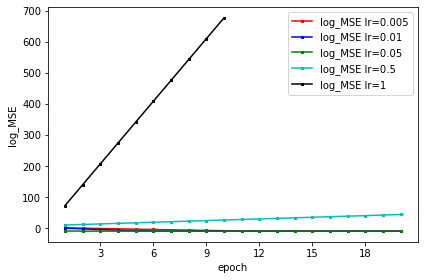

In [20]:

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

epoch = 20 
lr_list=[0.005,0.01, 0.05, 0.5,1]
color=["r","b","g","c",'k']
log_MSE=None
fig=plt.figure()

for id in range(1,6):
    co = color[id-1]
    lr = lr_list[id-1]
    MSE_epoch =np.zeros([epoch ,1])
    weight_epoch = np.zeros([epoch,dim])
    W_old=np.array([0,0,0]).reshape(dim,1)
    for this in range(epoch):
        for d in range(N) :
            s=np.dot(X[d,:],W_old)

            error= D[d,:]-s

            dx = error*X[d,:]
            W_new = W_old.reshape(3,1)+lr*(dx.reshape(3,1))
            W_old = W_new
        MSE_this =get_MSE(D,W_new,X)
        MSE_epoch[this,:]=MSE_this
    log_MSE= np.log(MSE_epoch)
    
    plt.plot(range(1,21),log_MSE.reshape(20,1),'s-',markersize=2,color = co ,label="log_MSE lr={}".format(lr))#s-:方形
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("epoch")
plt.ylabel("log_MSE")
plt.legend(loc = 'best')

fig.tight_layout()
#fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig("the epoch vs log_MSE_five lr.png",dpi=200)
plt.show()



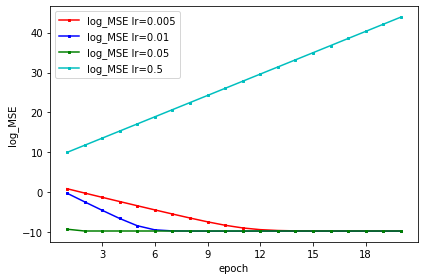

In [21]:

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

epoch = 20 
lr_list=[0.005,0.01, 0.05, 0.5]
color=["r","b","g","c"]
log_MSE=None
fig=plt.figure()

for id in range(1,5):
    co = color[id-1]
    lr = lr_list[id-1]
    MSE_epoch =np.zeros([epoch ,1])
    weight_epoch = np.zeros([epoch,dim])
    W_old=np.array([0,0,0]).reshape(dim,1)
    for this in range(epoch):
        weight_epoch[this,:]=W_old.reshape(dim)
        for d in range(N) :
            s=np.dot(X[d,:],W_old)

            error= D[d,:]-s

            dx = error*X[d,:]
            W_new = W_old.reshape(3,1)+lr*(dx.reshape(3,1))
            W_old = W_new

        MSE_this =get_MSE(D,W_new,X)
        MSE_epoch[this,:]=MSE_this
    log_MSE= np.log(MSE_epoch)
    
    plt.plot(range(1,21),log_MSE.reshape(20,1),'s-',markersize=2,color = co ,label="log_MSE lr={}".format(lr))#s-:方形
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("epoch")
plt.ylabel("log_MSE")
plt.legend(loc = 'best')

fig.tight_layout()
#fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig("the epoch vs log_MSE 4 lr.png",dpi=200)
plt.show()



# This is for full-batch

In [22]:
def get_error(W,X,D):
    return D-np.dot(X,W)
def Weight_update(lr,W_old,X,D):
    error=get_error(W_old,X,D)
    W_new = W_old+lr*np.dot(X.T,error)
    return W_new
def get_MSE(D,W,X):
    y = np.dot(X,W)
    MSE= mean_squared_error(D, y)/2
    return MSE

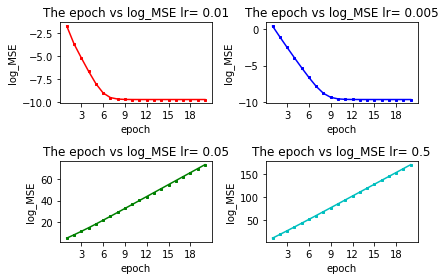

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

epoch = 20 
lr_list=[0.01,0.005, 0.05, 0.5 ]
color=["r","b","g","c"]
log_MSE=None
fig=plt.figure()
for id in range(1, 5):
    co = color[id-1]
    ax=plt.subplot(2, 2, id)
    lr = lr_list[id-1]
    MSE_epoch =np.zeros([epoch ,1])
    weight_epoch = np.zeros([epoch,dim])
    W_old=np.array([0,0,0]).reshape(dim,1)
    for this in range(epoch):
        weight_epoch[this,:]=W_old.reshape(dim)
        W_new = Weight_update(lr,W_old,X,D)
        W_old = W_new
        MSE_this =get_MSE(D,W_new,X)
        MSE_epoch[this,:]=MSE_this
    log_MSE= np.log(MSE_epoch)
    
    
    
    ax.plot(range(1,21),log_MSE.reshape(20,1),'s-',markersize=2,color = co ,label="log_MSE")#s-:方形
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title("The epoch vs log_MSE lr= {}".format(lr))
    ax.set_xlabel("epoch")
    ax.set_ylabel("log_MSE")

fig.tight_layout()
#fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig("the epoch vs log_MSE_different lr.png",dpi=200)
plt.show()



(20, 1)
(20, 3)


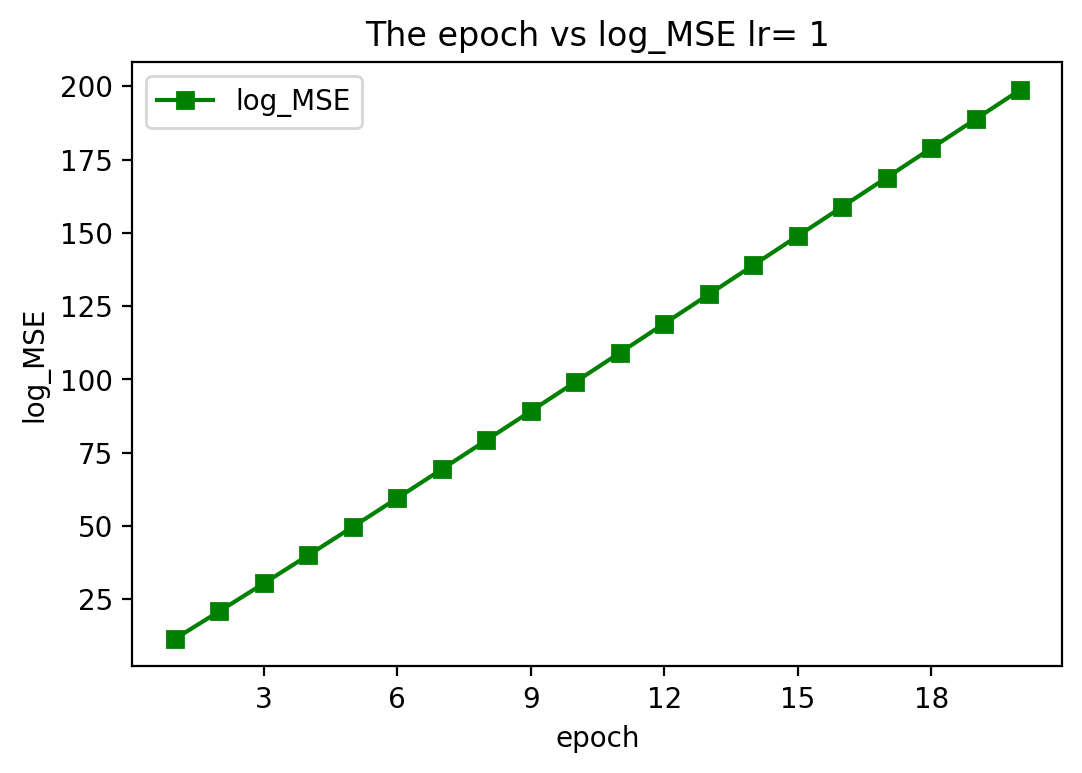

In [24]:
epoch = 20
lr = 1
MSE_epoch =np.zeros([epoch ,1])
print(MSE_epoch.shape)
weight_epoch = np.zeros([epoch,dim])
print(weight_epoch.shape)
W_old=np.array([0,0,0]).reshape(dim,1)
for this in range(epoch):
    weight_epoch[this,:]=W_old.reshape(dim)
    W_new = Weight_update(lr,W_old,X,D)
    W_old = W_new
    MSE_this =get_MSE(D,W_new,X)
    MSE_epoch[this,:]=MSE_this
log_MSE= np.log(MSE_epoch)
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.figure(dpi=200)
plt.plot(range(1,21),log_MSE.reshape(20,1),'s-',color = 'g',label="log_MSE")#s-:方形
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("The epoch vs log_MSE lr= {}".format(lr))
plt.xlabel("epoch")#横坐标名字
plt.ylabel("log_MSE")#纵坐标名字
plt.legend(loc = "best")#图例
plt.savefig("the epoch vs log_MSE_lr{}.png".format(lr))
plt.show()

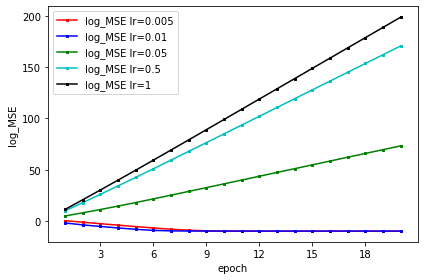

In [25]:

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

epoch = 20 
lr_list=[0.005,0.01, 0.05, 0.5,1]
color=["r","b","g","c",'k']
log_MSE=None
fig=plt.figure()

for id in range(1,6):
    co = color[id-1]
    lr = lr_list[id-1]
    MSE_epoch =np.zeros([epoch ,1])
    weight_epoch = np.zeros([epoch,dim])
    W_old=np.array([0,0,0]).reshape(dim,1)
    for this in range(epoch):
        weight_epoch[this,:]=W_old.reshape(dim)
        W_new = Weight_update(lr,W_old,X,D)
        W_old = W_new
        MSE_this =get_MSE(D,W_new,X)
        MSE_epoch[this,:]=MSE_this
    log_MSE= np.log(MSE_epoch)
    
    plt.plot(range(1,21),log_MSE.reshape(20,1),'s-',markersize=2,color = co ,label="log_MSE lr={}".format(lr))#s-:方形
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("epoch")
plt.ylabel("log_MSE")
plt.legend(loc = 'best')

fig.tight_layout()
#fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig("the epoch vs log_MSE_five lr.png",dpi=200)
plt.show()


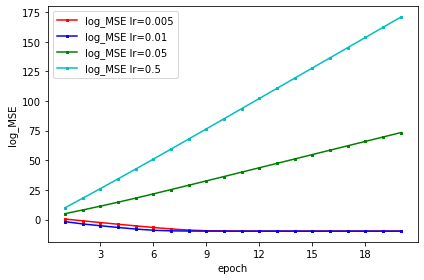

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

epoch = 20 
lr_list=[0.005,0.01, 0.05, 0.5]
color=["r","b","g","c"]
log_MSE=None
fig=plt.figure()

for id in range(1,5):
    co = color[id-1]
    lr = lr_list[id-1]
    MSE_epoch =np.zeros([epoch ,1])
    weight_epoch = np.zeros([epoch,dim])
    W_old=np.array([0,0,0]).reshape(dim,1)
    for this in range(epoch):
        weight_epoch[this,:]=W_old.reshape(dim)
        W_new = Weight_update(lr,W_old,X,D)
        W_old = W_new
        MSE_this =get_MSE(D,W_new,X)
        MSE_epoch[this,:]=MSE_this
    log_MSE= np.log(MSE_epoch)
    
    plt.plot(range(1,21),log_MSE.reshape(20,1),'s-',markersize=2,color = co ,label="log_MSE lr={}".format(lr))#s-:方形
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("epoch")
plt.ylabel("log_MSE")
plt.legend(loc = 'best')

fig.tight_layout()
#fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig("the epoch vs log_MSE 4 lr.png",dpi=200)
plt.show()

